# Example on the usage of of EMO methods (e.g., RVEA or NSGA-III) to solve a multi-scenario multiobjective optimization problems

Here, we show how NSGAIII/RVEA (availble in desdeo-emo) can be used to solve a multi-scenario multiobjective optimization problem. 
We will use the deeply uncertain version of the river problem [2] described in the following:

**Problem description:**

The river pollution problem [1] considers a river close to a city. 
There are two sources of pollution: industrial pollution from a 
fishery and municipal waste from the city and two treatment plants 
(in the fishery and the city). The pollution is reported in pounds of 
biochemical oxygen demanding material (BOD), and water quality is 
measured in dissolved oxygen concentration (DO).

Cleaning water in the city increases tax rate, and cleaning in the 
fishery reduces the return on investment. The problem is to improve 
the DO level in the city and at the municipality border (f1 and f2, respectively)
while, at the same time, maximizing the percent return on investment at the fishery (f3)
and minimizing addition to the city tax (f4).

Decision variables are:

* $ x_1 $:the proportional amounts of BOD removed from water after the fishery(treatment plant1)
* $ x_2 $:the proportional amounts of BOD removed from water after the city(treatment plant2)


The original problem [1] considered certain values for all the parameters. In this paper, we assume some of the parameters are deeply uncertain, and only a range of plausible values is known for each. These deeply uncertain parameters are as follows:

* $ a (\alpha) \in [3, 4.24]$, Water quality index after the fishery.

* $ b (\beta) \in [2.25, 2.4]$, BOD reduction rate at treatment plant 1 (after fishery).

* $ d (\delta) \in [0.075, 0.092]$, BOD reduction rate at treatment plant 2 (after the city).

* $ e (\xi) \in [0.067, 0.083]$, The effective rate of BOD reduction at treatment plant 1 after the city.

* $ h (\eta)  \in [1.2, 1.50]$, Another parameter that uses to calculate the effective BOD reduction rate at the second treatment plant.

* $ m (r) \in [5.1, 12.5]$, Investment return rate.

Then, the uncertain version of the river problem has been formulated as follows [2]:

$$
\begin{equation}\
\begin{array}{rll}\
\text{maximize}  & f_1({\mathbf{x}}) =& \alpha + (log((\frac{\beta}{2} - 1.14)^2) + \beta^3) x_1 \\ % - 4.07 - 2.27 x_1 
\text{maximize}  & f_2({\mathbf{x}}) =& \gamma + \delta x_1  + \xi x_2  + \frac{0.01}{\eta - x_1^2} + \frac{0.30}{\eta - x_2^2} \\ 
\text{maximize}  & f_3({\mathbf{x}}) =&  r - \frac{0.71}{1.09 - x_1^2} \\ 
\text{mininimize}  & f_4({\mathbf{x}}) =& - 0.96 + \frac{0.96}{1.09 - x_2^2} \\ 
\text{subject to}  && 0.3 \leq x_1, x_2 \leq 1.0, \\
\end{array}\
\end{equation}
$$
where $\gamma = log((\frac{\alpha}{2}-1)) + \frac{\alpha}{2} + 1.5$.


[1] S. C. Narula and H. R. Weistroffer, ‘‘A flexible method for nonlinear multicriteria decision-making problems,’’ IEEE Trans. Syst., Man, Cybern.,
vol. 19, no. 4, pp. 883–887, Jul. 1989.

[2] B. Shavazipour, J. H. Kwakkel, K. Miettinen, ‘‘Let decision-makers direct the search for robust solutions: An interactive framework for multiobjective robust optimization under deep uncertainty,’’ submitted.

Let us start by importing some required objects and classess.

In [8]:
from desdeo_problem.problem.Variable import Variable
from desdeo_problem.problem.Objective import VectorObjective
from desdeo_problem.problem.Problem import MOProblem

import numpy as np
import pandas as pd

Now, let us define the problem. Note that, in this example, the fourth objective function involved no uncertain parameter. Therefore, there is no variation in its values defining the problem. So, we should separate the uncertain and deterministic objective functions.

In [9]:
# It returns a multi-scenario multiobjective problem (MS-MOP)
                                                                                                               
def ms_mop_river_problem(var_iv: np.array = np.array([0.5, 0.5]), 
                         scenarios = pd.read_csv(r'notebook_extras/selected_scenarios_river(12.5.22).csv')) -> MOProblem:
    """
    The river pollution problem with 4 objectives and 6 deeply uncertain parameters. 
        The original problem [1] considered certain values for all the parameters. Here, 
        we assume some of the parameters are deeply uncertain, and only a range of plausible values 
        is known for each [2].     

        [1] NARULA, S. C. & WEISTROFFER, H. R. (1989). A flexible method for 
        nonlinear multicriteria decisionmaking problems. IEEE transactions on 
        systems, man, and cybernetics, 19(4), 883-887.

        [2] Shavazipour, B. & Kwakkel, J. H. & Miettine, K. (unpublished). Let decision-makers direct 
        the search for robust solutions: An interactive framework for multiobjective robust optimization 
        under deep uncertainty. ?, ?(?), ?-?.
        
    Arguments:
            var_iv (np.array): Optional, initial variable values. Must be between 0.3 and 1.0.
                Defaults are 0.5 and 0.5.

            scenarios (dict): Optional, combination of various uncertain parameters constract 
            a scenarios to be considered in the multi-scenario MOP, including the following uncertain parameters:
            𝑎(𝛼)∈[3.6,4.24], Water quality index after the fishery. 
            𝑏(𝛽)∈[2.25,2.29], BOD reduction rate at treatment plant 1 (after fishery).
            𝑑(𝛿)∈[0.075,0.092], BOD reduction rate at treatment plant 2 (after the city).
            𝑒(𝜉)∈[0.067,0.083], The effective rate of BOD reduction at treatment plant 1 after the city.
            ℎ(𝜂)∈[1.2,1.50], Another parameter that uses to calculate the effective BOD reduction rate 
                at the second treatment plant. 
            𝑚(𝑟)∈[5.1,12.5], Investment return rate.
            Default is scenarios = pd.read_csv('selected_scenarios_river(12.5.22).csv')

    Returns:
            MS_MOProblem: a multi-scenario multiobjective problem object.
    """
    # Note that, in this example, the fourth objective function involved no uncertain parameter. 
    # Therefore, there is no variation in its values defining the problem. 
    # So, we should separate the uncertain and deterministic objective functions. 
    n_uncertain_obj = 3
    n_deterministic_obj = 1

    def f_multi_scenarios(x: np.ndarray) -> np.ndarray:
        """
        Arguments:
        x (np.array): initial variable values. Must be between 0.3 and 1.0.
        Returns:
        output (np.array): objective values in all selected scenarios.
        """
        x = np.atleast_2d(x)
        output = np.zeros((n_uncertain_obj*len(scenarios)+n_deterministic_obj, len(x)))
        
        for s in range(len(scenarios)):
            a = scenarios.a[s]
            b = scenarios.b[s]
            d = scenarios.d[s]
            e = scenarios.e[s]
            h = scenarios.h[s]
            m = scenarios.m[s]
            # Definning the objective functions (negative sign at the beginning is to convert maximization to minimization).
            output[s*n_uncertain_obj+0,:] = - (a + (np.log((b/2-1.14)**2) + b**3) * x[:, 0])
            output[s*n_uncertain_obj+1,:] = - ((np.log((a/2-1)) + a/2 + 1.5) + d*x[:, 0] + e*x[:, 1] + 0.01 / (h - x[:, 0]**2) + 0.3 / (h - x[:, 1]**2))
            output[s*n_uncertain_obj+2,:] = - (m - 0.71 / (1.09 - x[:, 0]**2))

        # f_4 has no uncertain parameters and returning a certain value in all scenarios without any variation.
        # Multi
        output[-1,:] = - (0.96 - 0.96 / (1.09 - x[:, 1]**2))
    
        return output.T  


    if np.any(1 < var_iv) or np.any(var_iv < 0.3):

        raise ValueError("Initial variable values need to be between lower and upper bounds")
       
    x_1 = Variable("the proportionate amount of BOD removed from water at the fishery", var_iv[0], 0.3, 1.0)
    x_2 = Variable("the proportionate amount of BOD removed from water at the city", var_iv[1], 0.3, 1.0)

    variables = [x_1, x_2]

    # Creating functions names
    # The number of objective functions is varied based on the number of considered scenarios in the MS-MOP.
    Y = []
    for s in range(len(scenarios)):
        Y.extend([f"f_1{s+1}", f"f_2{s+1}",f"f_3{s+1}"])
    Y.extend(["f4"])   
    
    # Creating the objective vector
    F = VectorObjective(Y, f_multi_scenarios)

    # Creating the MS-MO problem object
    problem = MOProblem(variables=variables, objectives=[F])

    return problem

In [10]:
# Call the problem
MOproblem = ms_mop_river_problem()

Now, the problem is fully specified and can be evaluated and played around with.

In [11]:
print("N of objectives:", MOproblem.n_of_objectives)
print("N of variables:", MOproblem.n_of_variables)
print("N of constraints:", MOproblem.n_of_constraints)

N of objectives: 19
N of variables: 2
N of constraints: 0


We can also solve the MS-MO problem using EMO methods implemented in DESDEO, such as RVEA or NSGA-III. 

For example, we import **RVEA** and solve the above 19-(meta)objective optimization problem. 

In [12]:
from desdeo_emo.EAs.RVEA import RVEA
from desdeo_emo.utilities.plotlyanimate import animate_init_

In [13]:
evolver = RVEA(MOproblem, interact=False, n_iterations=5, n_gen_per_iter=100)
figure = animate_init_(evolver.population.objectives, filename="RVEA-ms-mop.html")

Plot saved as:  RVEA-ms-mop.html
View the plot by opening the file in browser.
To view the plot in Jupyter Notebook, use the IFrame command.


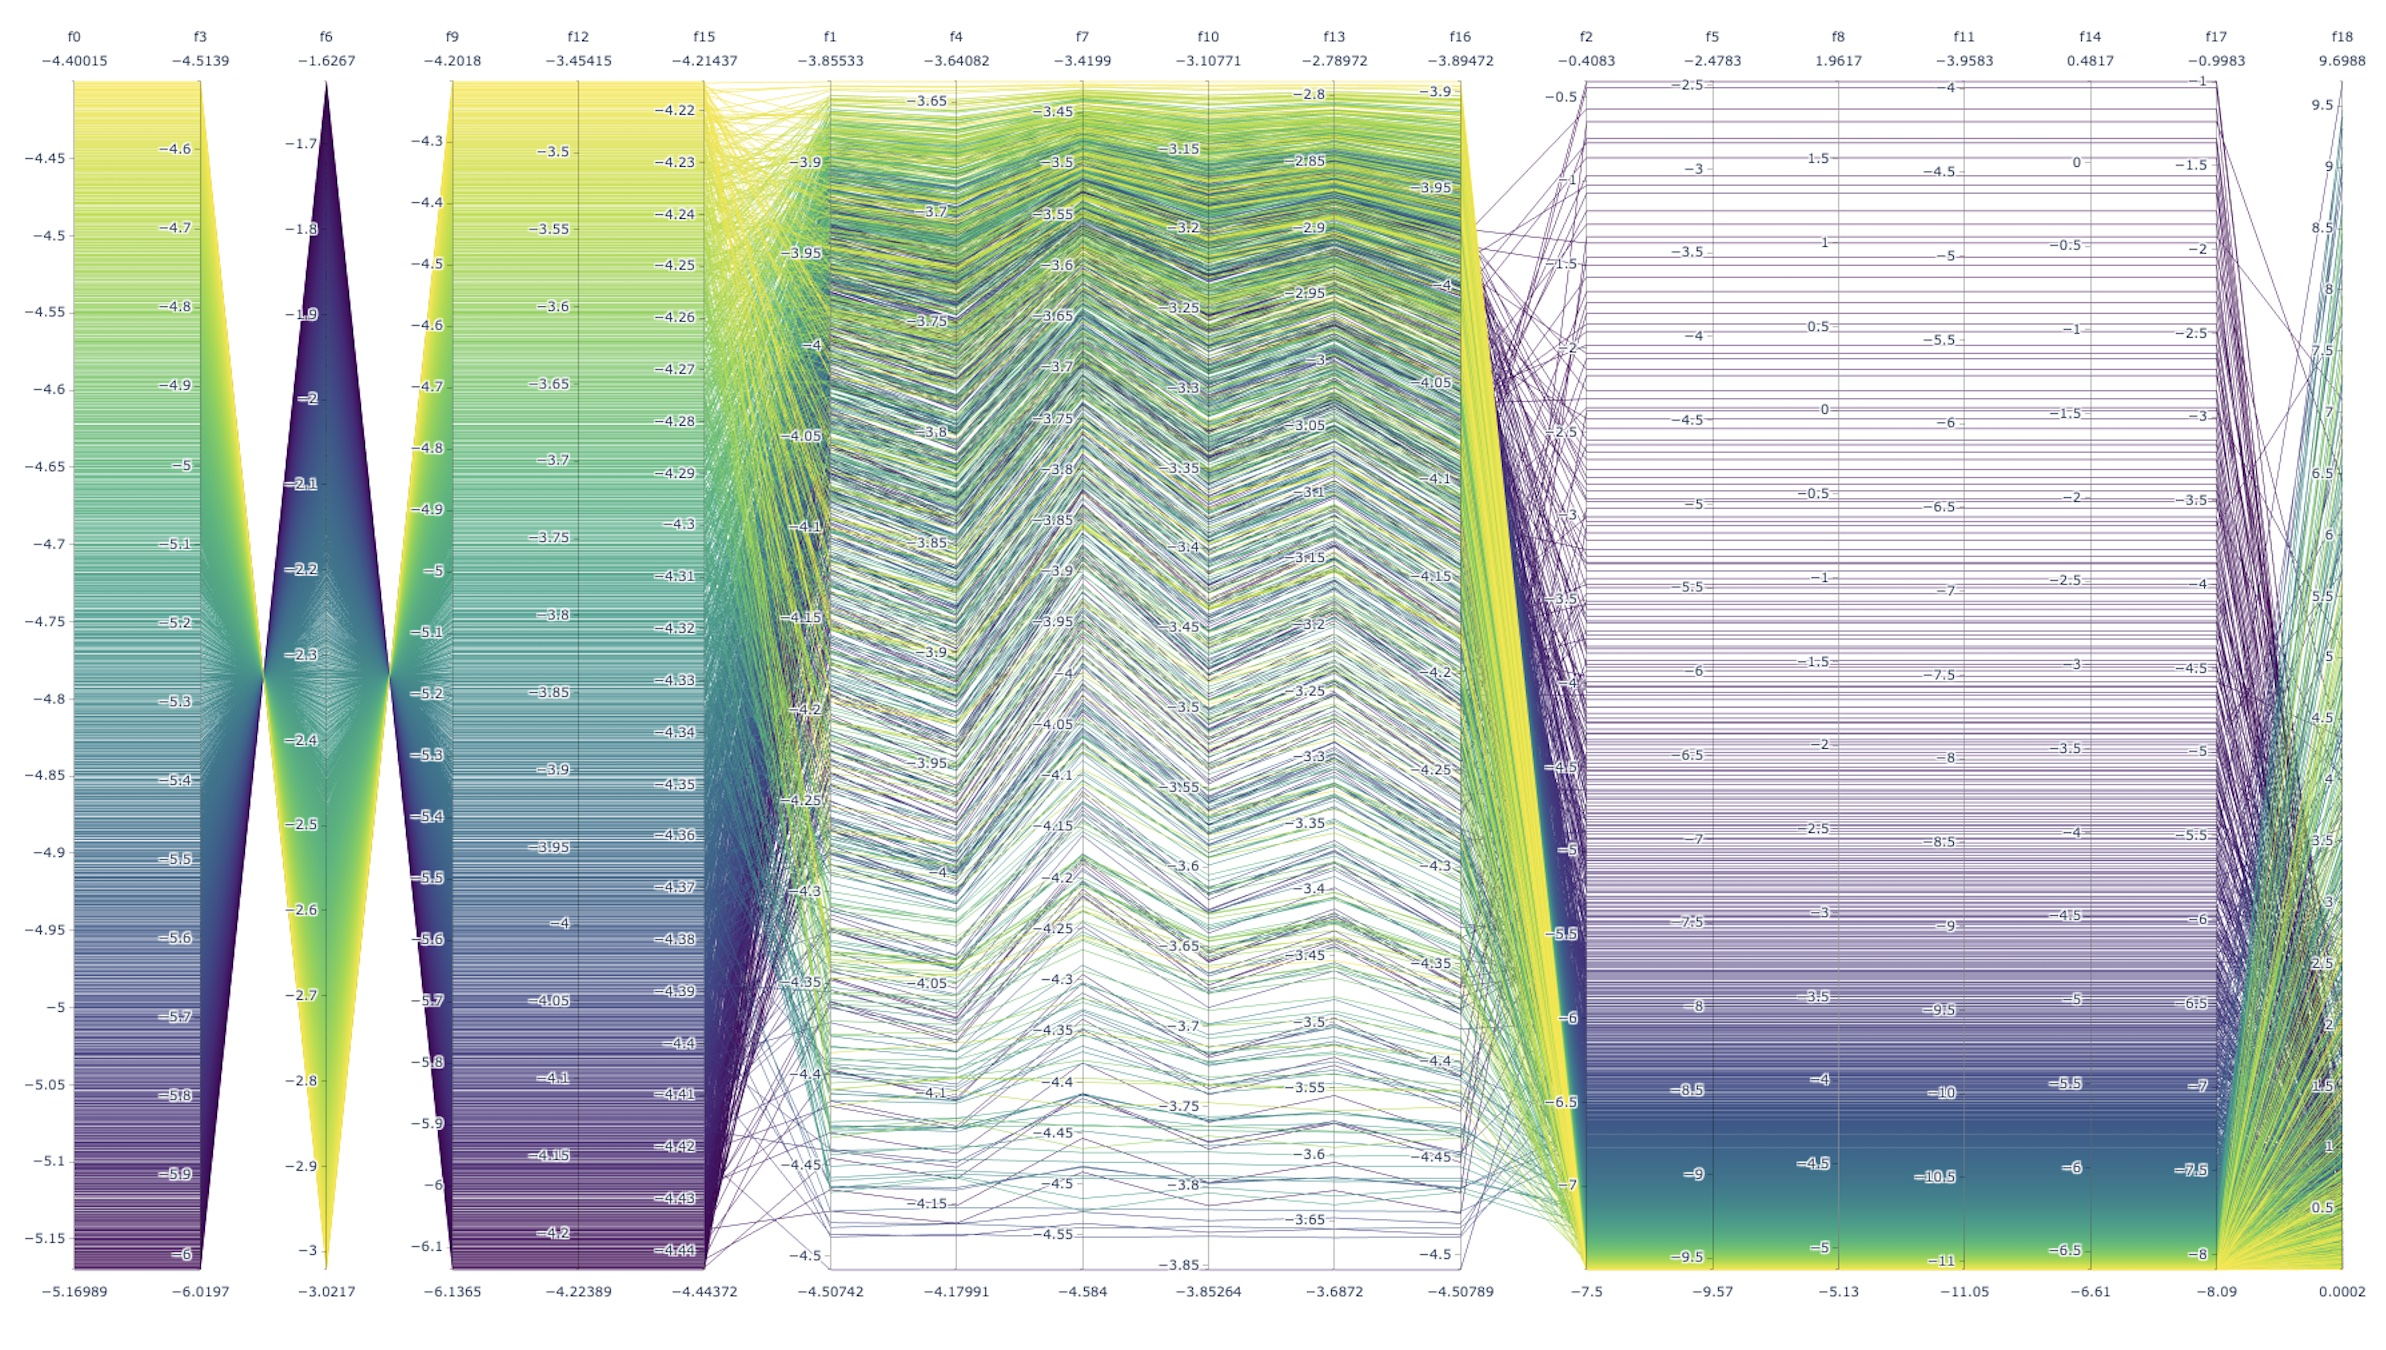

In [16]:
# insert image
from IPython.display import Image
Image(filename = "notebook_extras/RVEA-ms-mop.jpg", width = 1300, height = 300)

In the above (re-arranged) figure, each line represents a Pareto optimal solution. f0, f3,f6,f9,f12, and f15 show the values that can be gained in each Pareto optimal solution in six considered scenarios, respectively. Similarly, (f1, f4,f7,f10,f13, f16) and (f2, f5,f8,f11,f14, f17) describe the second and third objective functions' values in various scenarios. Finally, the last column (f18) corresponds to the values of the fourth objective function (a deterministic function). 